## Plotting reanalysis grid points (Optional)

I've left this as optional because making maps is memory intensive and might take a while to complete.

It is useful to plot the reanalysis grid points to get an idea of where they are.

I use the basemap tool from the matplotlib module to do this.  There are some examples of map plotting here

http://matplotlib.org/basemap/users/examples.html

I also use numpy, which I import as np, and the pyplot tool from matplotlib, which I import as plt.

In [1]:
%pylab inline
from mpl_toolkits.basemap import Basemap, shiftgrid, cm
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset

Populating the interactive namespace from numpy and matplotlib


Set the variable root_dir to the location of the training data 

In [2]:
root_dir ="C:/Users/apbarret/Documents/CHARIS/Almaty"

We'll get the latitude and longitude points for the ERA-Interim grid from the temperature file we've been working with.

In [4]:
ncfile = root_dir+"/"+"downscaling_input/era_interim.t.20010601-20010630.example.nc"
f = Dataset(ncfile,"r")
lat = f.variables['latitude'][:]
lon = f.variables['longitude'][:]
f.close()

The lat and lon arrays are 1d arrays. To plot all the points we need to create 2d arrays.  We use the numpy tool meshgrid to do this.

In [5]:
print lat # Print the 1d lat, lon arrays
print lon
lon2d, lat2d = np.meshgrid(lon,lat)

print lat2d # Print the 2d latitude array

[ 37.5   36.75  36.    35.25  34.5 ]
[ 72.    72.75  73.5   74.25  75.    75.75  76.5   77.25]
[[ 37.5   37.5   37.5   37.5   37.5   37.5   37.5   37.5 ]
 [ 36.75  36.75  36.75  36.75  36.75  36.75  36.75  36.75]
 [ 36.    36.    36.    36.    36.    36.    36.    36.  ]
 [ 35.25  35.25  35.25  35.25  35.25  35.25  35.25  35.25]
 [ 34.5   34.5   34.5   34.5   34.5   34.5   34.5   34.5 ]]


We'll also plot the locations of meteorological stations in the region.  I use pandas to do this.

In [7]:
import pandas as pd
station_file = root_dir+"/"+"downscaling_input/wapda_met_stations.v2.csv"
station = pd.read_csv(station_file, names=("station_id","station","latitude","longitude","elevation"))
station

station_id                     station  latitude  longitude  elevation
0            1                      Gilgit   35.9261    74.3711       1479
1            2                     Shangla   34.8808    72.5908       2240
2            3                      Shigar   35.4333    75.7333       2367
3            4                       Rattu   35.1500    74.8000       2718
4            5                        Rama   35.3592    74.8117       3179
5            6                      Naltar   36.1667    74.1833       2898
6            7                     Shogran   34.6200    73.4855       2740
7            8                     Ushkore   36.0456    73.3989       3051
8            9                      Hushey   35.4239    76.3667       3075
9           10                      Kelash   35.7036    71.6547       2920
10          11                 Pir Chinasi   34.3850    73.5450       2594
11          12                   Zani Pass   36.3361    72.1706       3839
12          13                       Yasin   36.4011    73.5000       3280
13          14               Saif ul Muluk   34.8814    73.6931       3230
14          15                   Khot Pass   36.5167    72.6000       3624
15          16                    Shendure   36.0908    72.5500       3712
16          17                      Ziarat   36.7980    74.4820       3020
17          18                      Burzil   34.9008    75.1667       4239
18          19                      Deosai   35.0875    75.5383       4149
19          20                   Khunjerab   36.8411    75.4192       4440

Just for fun, we'll plot these points over the ETOPO5 topography data set.  This is on your memory sticks but I downloaded a version from the url listed below.  Uncomment the line that start "# " to download the data.  Not the lines that start with "## "

In [9]:
## read in etopo5 topography/bathymetry from URL - remove leading # from following two lines
#filename = 'http://ferret.pmel.noaa.gov/thredds/dodsC/data/PMEL/etopo5.nc'

# Add code to read from mem sticks - comment out these two lines if you are reading from the URL.
filename = root_dir+"/"+"downscaling_input/etopo5.nc"

etopodata = Dataset(filename)

topoin = etopodata.variables['ROSE'][:]
lons = etopodata.variables['ETOPO05_X'][:]
lats = etopodata.variables['ETOPO05_Y'][:]

etopodata.close()

## shift data so lons go from -180 to 180 instead of 20 to 380.
topoin,lons = shiftgrid(180.,topoin,lons,start=False)


This next step generates a map.  It might take some time to process because it has to reproject the etopo5 data.  It takes about a minute on my machine, so take some time and relax.

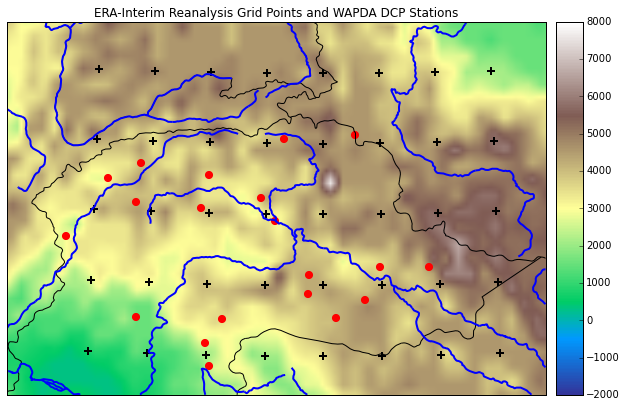

In [10]:
# plot topography/bathymetry as an image.

# create the figure and axes instances.
fig = plt.figure(figsize=(10,10))
ax = fig.add_axes([0.1,0.1,0.8,0.8])
# setup of basemap ('lcc' = lambert conformal conic).
# use major and minor sphere radii from WGS84 ellipsoid.
m = Basemap(llcrnrlon=71.,llcrnrlat=34.,urcrnrlon=78.,urcrnrlat=38.,\
            rsphere=(6378137.00,6356752.3142),\
            resolution='h',area_thresh=1000.,projection='lcc',\
            lat_1=50.,lon_0=75.,ax=ax)

# transform to nx x ny regularly spaced 5km native projection grid
nx = int((m.xmax-m.xmin)/5000.)+1; ny = int((m.ymax-m.ymin)/5000.)+1
topodat = m.transform_scalar(topoin,lons,lats,nx,ny)
# plot image over map with imshow.
im = m.imshow(topodat,plt.cm.terrain,vmin=-2000,vmax=8000)

# draw coastlines and political boundaries.
m.drawcoastlines()
m.drawcountries(linewidth=1.)
m.drawrivers(linewidth=2.,color='b')

x, y = m(lon2d, lat2d)
m.scatter(x, y, s=50, marker='+', color='k', ax=ax, linewidth=2)

# expects numpy arrays not pandas series
xs, ys = m(np.array(station['longitude']),np.array(station['latitude']))
m.scatter(xs,ys, s=50, marker='o', color='r')

# draw parallels and meridians.
# label on left and bottom of map.
parallels = np.arange(0.,80,20.)
m.drawparallels(parallels,labels=[1,0,0,1])
meridians = np.arange(10.,360.,30.)
m.drawmeridians(meridians,labels=[1,0,0,1])
# add colorbar
cb = m.colorbar(im,"right", size="5%", pad='2%')
ax.set_title('ERA-Interim Reanalysis Grid Points and WAPDA DCP Stations')
plt.show()


The Pakistan Meteorological Department also has stations in this region but both PMD and WAPDA stations are at low elevations compared to the surrounding topography.  The highest station is Khunjerab at 4440 m.